# All states Census 2017 Population Estimates Data cleaning

In [2]:
### import libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

pd.set_option('display.max_columns',None)

In [3]:
## import dataset
Data = pd.read_excel('/Users/inazawaelectronics/Desktop/Data-Analyst-Intern-Project/BIG GAME PROJECT/Data/All states Census 2017 Population Estimates.xlsx')
Data.head()

,GEOID,GEOID2,Geography Name,"April 1, 2010 - Census","April 1, 2010 - Estimates Base",Population Estimate (as of July 1) - 2010,Population Estimate (as of July 1) - 2011,Population Estimate (as of July 1) - 2012,Population Estimate (as of July 1) - 2013,Population Estimate (as of July 1) - 2014,Population Estimate (as of July 1) - 2015,Population Estimate (as of July 1) - 2016,Population Estimate (as of July 1) - 2017
0,0400000US01,1,Alabama,4779736,4780135,4785579,4798649,4813946,4827660,4840037,4850858,4860545,4874747
1,0400000US02,2,Alaska,710231,710249,714015,722259,730825,736760,736759,737979,741522,739795
2,0400000US04,4,Arizona,6392017,6392309,6407002,6465488,6544211,6616124,6706435,6802262,6908642,7016270
3,0400000US05,5,Arkansas,2915918,2916031,2921737,2938640,2949208,2956780,2964800,2975626,2988231,3004279
4,0400000US06,6,California,37253956,37254518,37327690,37672654,38019006,38347383,38701278,39032444,39296476,39536653


In [4]:
## identify dataset shape
Data.shape

(52, 13)

In [5]:
## find duplicate values if there any 
Data[Data.duplicated()]

,GEOID,GEOID2,Geography Name,"April 1, 2010 - Census","April 1, 2010 - Estimates Base",Population Estimate (as of July 1) - 2010,Population Estimate (as of July 1) - 2011,Population Estimate (as of July 1) - 2012,Population Estimate (as of July 1) - 2013,Population Estimate (as of July 1) - 2014,Population Estimate (as of July 1) - 2015,Population Estimate (as of July 1) - 2016,Population Estimate (as of July 1) - 2017


### No Duplicate values in this data set

In [6]:
### find null values

Data.isnull().sum()

GEOID                                        0
GEOID2                                       0
Geography Name                               0
April 1, 2010 - Census                       0
April 1, 2010 - Estimates Base               0
Population Estimate (as of July 1) - 2010    0
Population Estimate (as of July 1) - 2011    0
Population Estimate (as of July 1) - 2012    0
Population Estimate (as of July 1) - 2013    0
Population Estimate (as of July 1) - 2014    0
Population Estimate (as of July 1) - 2015    0
Population Estimate (as of July 1) - 2016    0
Population Estimate (as of July 1) - 2017    0
dtype: int64

### No Null values

In [7]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
GEOID2,52.0,2.978846e+01,1.677456e+01,1.0,16.75,29.5,42.50,72.0
"April 1, 2010 - Census",52.0,6.009064e+06,6.764460e+06,563626.0,1761651.25,4085220.5,6591856.75,37253956.0
"April 1, 2010 - Estimates Base",52.0,6.009313e+06,6.764684e+06,563767.0,1761657.75,4085206.0,6591992.25,37254518.0
Population Estimate (as of July 1) - 2010,52.0,6.020384e+06,6.779468e+06,564376.0,1765195.00,4092510.5,6609053.75,37327690.0
Population Estimate (as of July 1) - 2011,52.0,6.063904e+06,6.848039e+06,567602.0,1777025.75,4117175.0,6663922.25,37672654.0
Population Estimate (as of July 1) - 2012,52.0,6.108226e+06,6.917273e+06,576608.0,1789814.75,4138796.5,6717445.00,38019006.0
Population Estimate (as of July 1) - 2013,52.0,6.150530e+06,6.982359e+06,582341.0,1791796.50,4159392.5,6774206.00,38347383.0
Population Estimate (as of July 1) - 2014,52.0,6.195335e+06,7.056337e+06,583334.0,1793315.75,4185544.0,6830176.50,38701278.0
Population Estimate (as of July 1) - 2015,52.0,6.240635e+06,7.131146e+06,586102.0,1792156.25,4219297.0,6889901.00,39032444.0
Population Estimate (as of July 1) - 2016,52.0,6.284855e+06,7.197166e+06,584910.0,1791484.25,4261051.0,7001715.00,39296476.0


In [9]:
## create a list only including numarical features 
numarical_features = list(Data.select_dtypes('int').columns[1:])
numarical_features

['April 1, 2010 - Census',
 'April 1, 2010 - Estimates Base',
 'Population Estimate (as of July 1) - 2010',
 'Population Estimate (as of July 1) - 2011',
 'Population Estimate (as of July 1) - 2012',
 'Population Estimate (as of July 1) - 2013',
 'Population Estimate (as of July 1) - 2014',
 'Population Estimate (as of July 1) - 2015',
 'Population Estimate (as of July 1) - 2016',
 'Population Estimate (as of July 1) - 2017']

/var/folders/8h/34w8609j6936zp6y_871bvk00000gn/T/ipykernel_52286/1595097160.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data[feature], bins= 50)


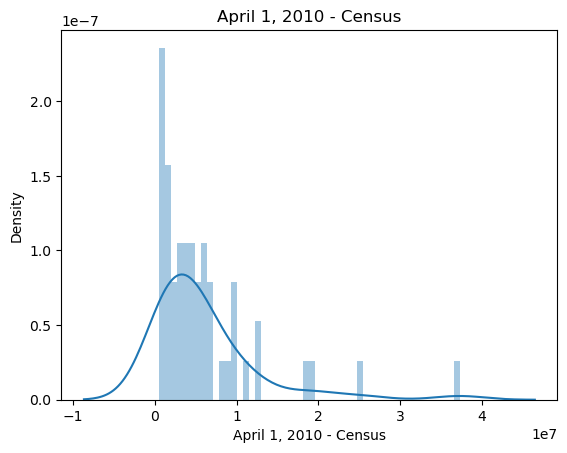

/var/folders/8h/34w8609j6936zp6y_871bvk00000gn/T/ipykernel_52286/1595097160.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data[feature], bins= 50)


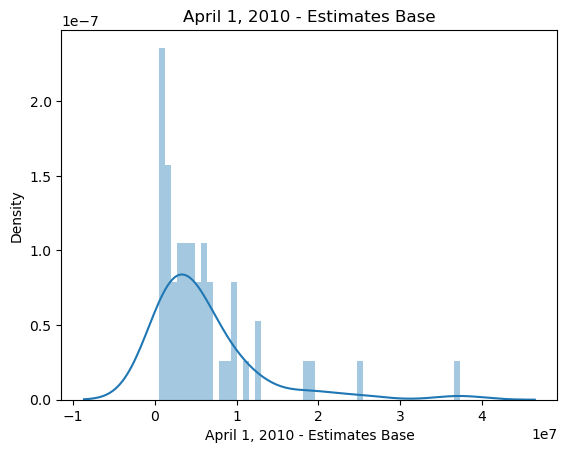

/var/folders/8h/34w8609j6936zp6y_871bvk00000gn/T/ipykernel_52286/1595097160.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data[feature], bins= 50)


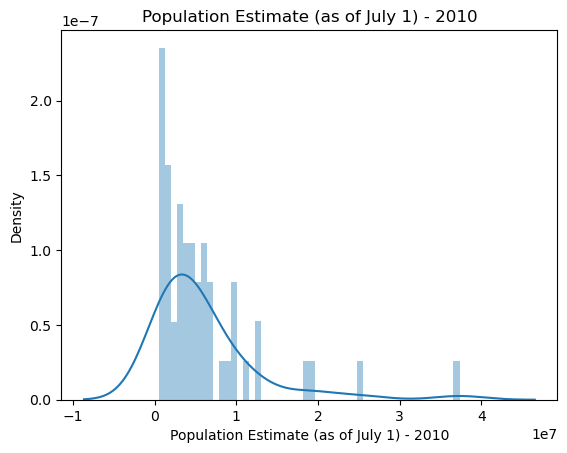

/var/folders/8h/34w8609j6936zp6y_871bvk00000gn/T/ipykernel_52286/1595097160.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data[feature], bins= 50)


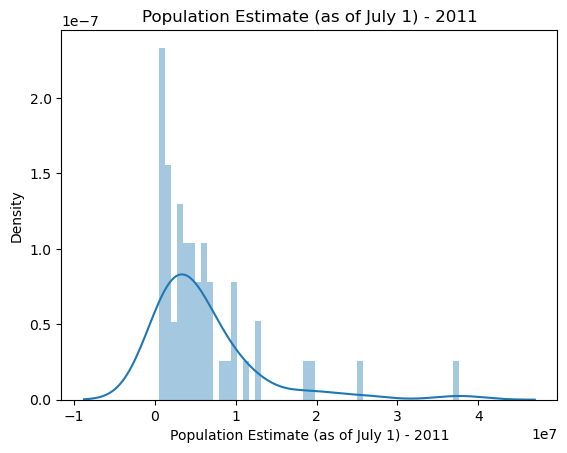

/var/folders/8h/34w8609j6936zp6y_871bvk00000gn/T/ipykernel_52286/1595097160.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data[feature], bins= 50)


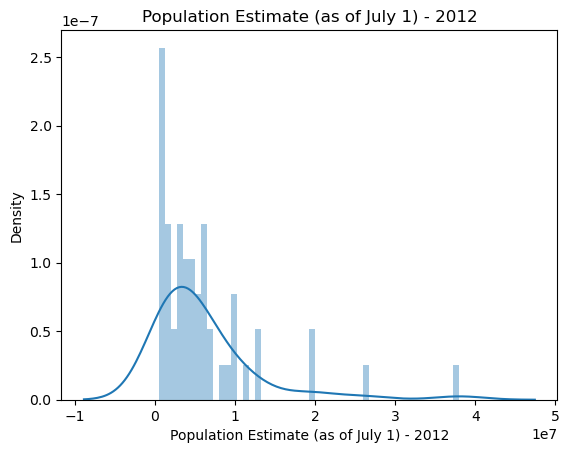

/var/folders/8h/34w8609j6936zp6y_871bvk00000gn/T/ipykernel_52286/1595097160.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data[feature], bins= 50)


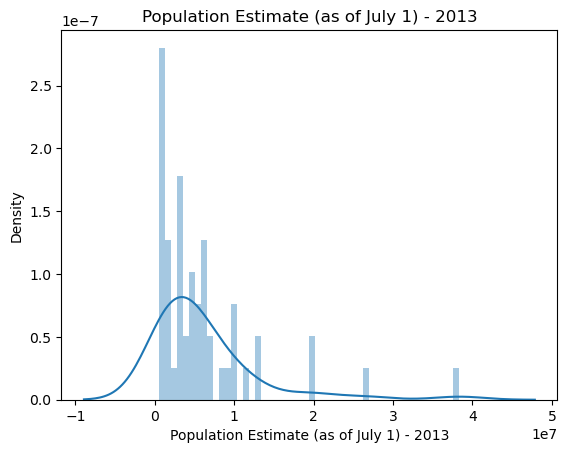

/var/folders/8h/34w8609j6936zp6y_871bvk00000gn/T/ipykernel_52286/1595097160.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data[feature], bins= 50)


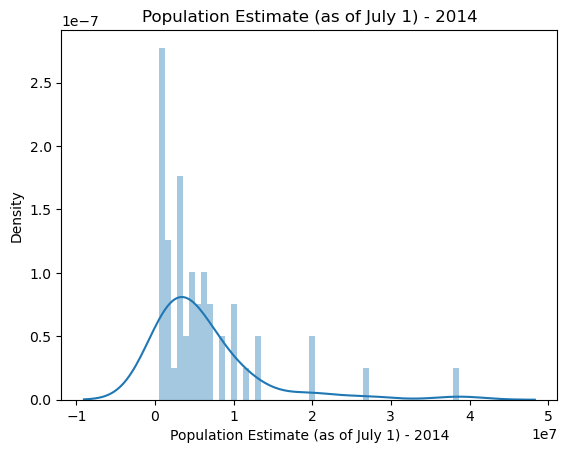

/var/folders/8h/34w8609j6936zp6y_871bvk00000gn/T/ipykernel_52286/1595097160.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data[feature], bins= 50)


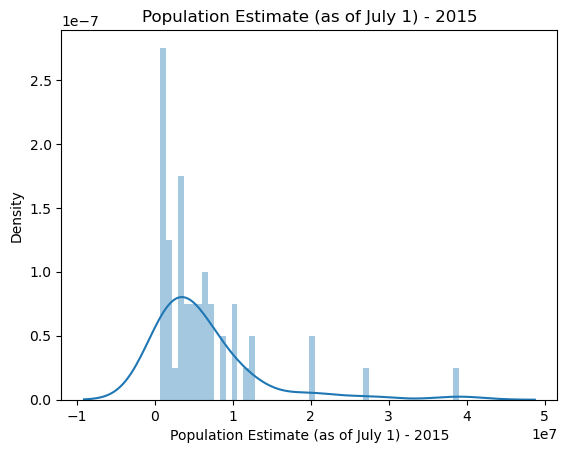

/var/folders/8h/34w8609j6936zp6y_871bvk00000gn/T/ipykernel_52286/1595097160.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data[feature], bins= 50)


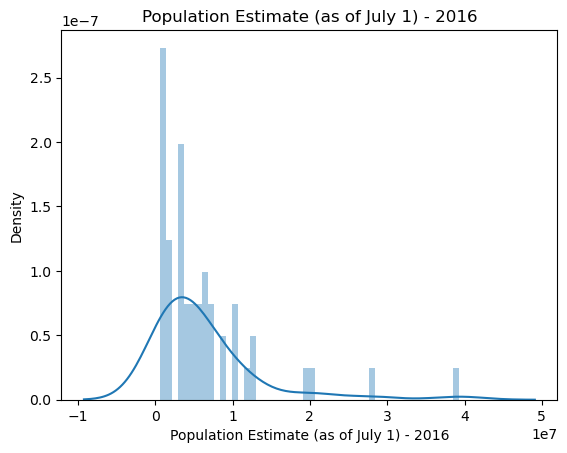

/var/folders/8h/34w8609j6936zp6y_871bvk00000gn/T/ipykernel_52286/1595097160.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data[feature], bins= 50)


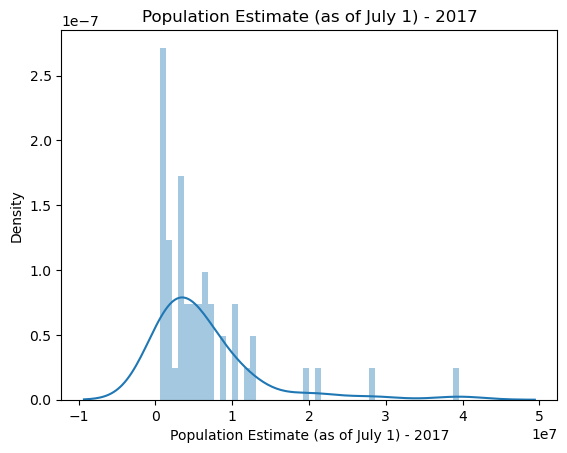

In [11]:
## create a histogram 

for feature in numarical_features:
    sns.distplot(Data[feature], bins= 50)
    plt.title(feature)
    plt.show()